In [6]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import shap
import sklearn
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("../src/helper-functions"))
import tree_shap

In [7]:
Tree = DecisionTreeRegressor()

In [8]:
target = [-10] * 10 + [10] * 5 + [5] * 20 + [14] * 5
cat_1 = [1] * 10 + [0] * 30
x = [60] * 5 + [45] * 30 +  [50] * 5
cat_2 = [1] * 15 + [0] * 25
data = pd.DataFrame({"cat_1": cat_1,
                     "cat_2": cat_2,
                     "x": x,
                     "target": target})

In [9]:
Tree.fit(data.values[:,:-1], data.values[:,-1])
explainer_tree = shap.TreeExplainer(Tree)
input_shap = np.array([0,1,60])
print(f"Shap values from the fitted explainer: {explainer_tree.shap_values(input_shap)}")
print(f"Theoretical Shap values: {np.array([191/36, 25/18, 155/36])}")
input_shap = np.array([[0,1,60], [1,0,40]])

Shap values from the fitted explainer: [5.30555556 1.38888889 4.30555556]
Theoretical Shap values: [5.30555556 1.38888889 4.30555556]


In [10]:
Tree.tree_.n_node_samples


array([40, 30, 25, 20,  5,  5, 10], dtype=int64)

In [11]:
explainer_tree_shap = shap.TreeExplainer(Tree)
explainer_tree_shap.shap_values(input_shap)

array([[  5.30555556,   1.38888889,   4.30555556],
       [-12.14583333,  -0.33333333,  -0.52083333]])

In [12]:
explainer_tree_cat = tree_shap.tree_cat_explainer(Tree)
explainer_tree_cat.shap_values(input_shap)

array([[  5.30555556,   1.38888889,   4.30555556],
       [-12.14583333,  -0.33333333,  -0.52083333]])

In [13]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=20,
                           n_informative=10, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier()
clf.fit(X, y)
input_rf = X[39]


In [14]:
explainer_rf_shap = shap.TreeExplainer(clf)
explainer_rf_shap.shap_values(input_rf)

array([[ 3.00337477e-01, -3.00337477e-01],
       [ 5.06996460e-03, -5.06996460e-03],
       [ 1.80952873e-02, -1.80952873e-02],
       [ 2.22997096e-02, -2.22997096e-02],
       [-4.64599756e-02,  4.64599756e-02],
       [ 2.47327364e-02, -2.47327364e-02],
       [ 1.90005312e-02, -1.90005312e-02],
       [ 2.66122678e-02, -2.66122678e-02],
       [ 1.63137036e-02, -1.63137036e-02],
       [ 3.33640756e-02, -3.33640756e-02],
       [ 3.75649358e-03, -3.75649358e-03],
       [ 3.02104664e-03, -3.02104664e-03],
       [ 2.03344252e-03, -2.03344252e-03],
       [ 3.06297702e-03, -3.06297702e-03],
       [-4.64556354e-05,  4.64556354e-05],
       [ 3.54245675e-03, -3.54245675e-03],
       [ 1.47792959e-04, -1.47792959e-04],
       [ 1.12928672e-03, -1.12928672e-03],
       [ 2.23409512e-03, -2.23409512e-03],
       [-1.86912771e-04,  1.86912771e-04]])

In [15]:
explainer_rf_cat = tree_shap.tree_cat_explainer(clf)
explainer_rf_cat.shap_values(input_rf)

array([[ 3.00337477e-01, -3.00337477e-01],
       [ 5.06996460e-03, -5.06996460e-03],
       [ 1.80952873e-02, -1.80952873e-02],
       [ 2.22997096e-02, -2.22997096e-02],
       [-4.64599756e-02,  4.64599756e-02],
       [ 2.47327364e-02, -2.47327364e-02],
       [ 1.90005312e-02, -1.90005312e-02],
       [ 2.66122678e-02, -2.66122678e-02],
       [ 1.63137036e-02, -1.63137036e-02],
       [ 3.33640756e-02, -3.33640756e-02],
       [ 3.75649358e-03, -3.75649358e-03],
       [ 3.02104664e-03, -3.02104664e-03],
       [ 2.03344252e-03, -2.03344252e-03],
       [ 3.06297702e-03, -3.06297702e-03],
       [-4.64556354e-05,  4.64556354e-05],
       [ 3.54245675e-03, -3.54245675e-03],
       [ 1.47792959e-04, -1.47792959e-04],
       [ 1.12928672e-03, -1.12928672e-03],
       [ 2.23409512e-03, -2.23409512e-03],
       [-1.86912771e-04,  1.86912771e-04]])

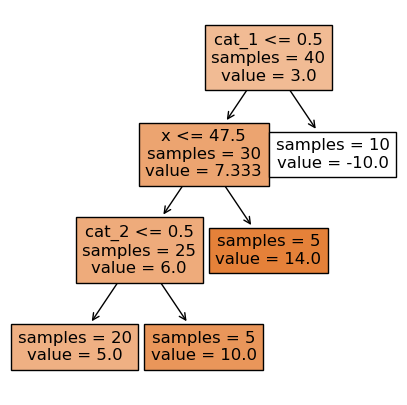

In [29]:
fig, ax = plt.subplots(figsize = (5,5))
plot_tree1 = plot_tree(Tree, ax = ax, filled=True, feature_names = ["cat_1", "cat_2", "x"], impurity = False)
plt.show()

In [11]:
Tree_classif = DecisionTreeClassifier()
Tree_classif.fit(X, y)

DecisionTreeClassifier()

In [12]:
explainer_tree_classif_cat = tree_shap.tree_cat_explainer(Tree_classif)
explainer_tree_classif_cat.shap_values(input_rf)

array([[ 5.01412913e-01, -5.01412913e-01],
       [-7.70167086e-02,  7.70167086e-02],
       [ 3.24248447e-04, -3.24248447e-04],
       [ 7.47177746e-03, -7.47177746e-03],
       [-6.46688178e-02,  6.46688178e-02],
       [ 9.20948737e-02, -9.20948737e-02],
       [-6.64407378e-03,  6.64407378e-03],
       [ 1.50264154e-02, -1.50264154e-02],
       [ 1.01335133e-02, -1.01335133e-02],
       [ 1.48290522e-02, -1.48290522e-02],
       [ 5.51059526e-03, -5.51059526e-03],
       [ 5.23121729e-04, -5.23121729e-04],
       [ 1.80017387e-03, -1.80017387e-03],
       [ 1.88036410e-05, -1.88036410e-05],
       [-5.07524310e-03,  5.07524310e-03],
       [ 5.07576684e-04, -5.07576684e-04],
       [ 5.13622857e-04, -5.13622857e-04],
       [-2.00677905e-04,  2.00677905e-04],
       [ 3.77964942e-05, -3.77964942e-05],
       [ 2.40103709e-03, -2.40103709e-03]])

In [13]:
explainer_tree_classif_shap = shap.TreeExplainer(Tree_classif)
explainer_tree_classif_shap.shap_values(input_rf)

array([[ 5.01412913e-01, -5.01412913e-01],
       [-7.70167086e-02,  7.70167086e-02],
       [ 3.24248447e-04, -3.24248447e-04],
       [ 7.47177746e-03, -7.47177746e-03],
       [-6.46688178e-02,  6.46688178e-02],
       [ 9.20948737e-02, -9.20948737e-02],
       [-6.64407378e-03,  6.64407378e-03],
       [ 1.50264154e-02, -1.50264154e-02],
       [ 1.01335133e-02, -1.01335133e-02],
       [ 1.48290522e-02, -1.48290522e-02],
       [ 5.51059526e-03, -5.51059526e-03],
       [ 5.23121729e-04, -5.23121729e-04],
       [ 1.80017387e-03, -1.80017387e-03],
       [ 1.88036410e-05, -1.88036410e-05],
       [-5.07524310e-03,  5.07524310e-03],
       [ 5.07576684e-04, -5.07576684e-04],
       [ 5.13622857e-04, -5.13622857e-04],
       [-2.00677905e-04,  2.00677905e-04],
       [ 3.77964942e-05, -3.77964942e-05],
       [ 2.40103709e-03, -2.40103709e-03]])

In [14]:
rf_classif = RandomForestRegressor()
rf_classif.fit(data.values[:,:-1], data.values[:,-1])

RandomForestRegressor()

In [15]:
explainer_rf_regre_cat = tree_shap.tree_cat_explainer(rf_classif)
explainer_rf_regre_cat.shap_values(input_shap)

array([[  5.03692809,   1.39483339,   4.31423851],
       [-12.32128329,  -0.3124442 ,  -0.5402725 ]])

In [16]:
explainer_rf_regre_shap = shap.TreeExplainer(rf_classif)
explainer_rf_regre_shap.shap_values(input_shap)

array([[  5.03692809,   1.39483339,   4.31423851],
       [-12.32128329,  -0.3124442 ,  -0.5402725 ]])

In [17]:
explainer_tree_cat = tree_shap.tree_cat_explainer(Tree, feature_groups= [[0,1], 2])
explainer_tree_cat.shap_values(input_shap)

array([[  6.83333333,   4.16666667],
       [-12.5       ,  -0.5       ]])

In [19]:
25/6

4.166666666666667

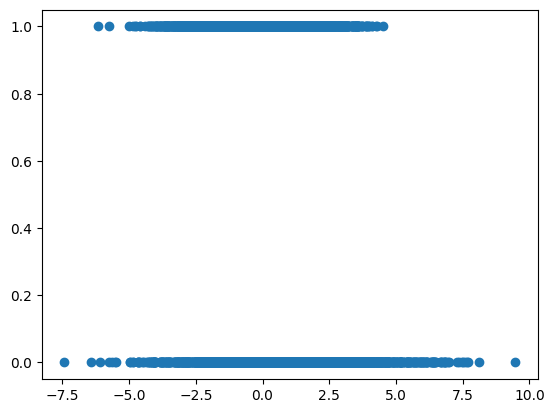

In [35]:
plt.scatter(X[:,0], y)
plt.show()

In [116]:
X, y = make_classification(n_samples=5000, n_features=7,
                           n_informative=4, n_redundant=0,
                           random_state=0, shuffle=False,
                           n_clusters_per_class = 5)
import create_categories
X_df = pd.DataFrame(X, columns= ["X_" + str(i) for i in range(X.shape[1])])
X_df["X_0"] = create_categories.transform_num_to_cat(X[:, 0], "X_new", 5)
X_df = pd.get_dummies(X_df, columns= ["X_0"], drop_first= True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.33, random_state=42)
rf = RandomForestClassifier().fit(X_train,y_train)
print(accuracy_score(y_test, rf.predict(X_test)))
print(precision_score(y_test, rf.predict(X_test)))
print(recall_score(y_test, rf.predict(X_test)))

0.8418181818181818
0.8649350649350649
0.8092345078979344


In [117]:
explain = shap.TreeExplainer(rf)
shap_val = explain.shap_values(X_test)

0.5000179104477613

0.014132489366429803
0.0012923225969897441
-0.004607116282716721
-6.296907613940938e-05
-0.00010313092190515279
0.0011973206995362598
0.002941565218053166
0.0011020330760455656
-0.0004937403074392553
0.0008742242742940809


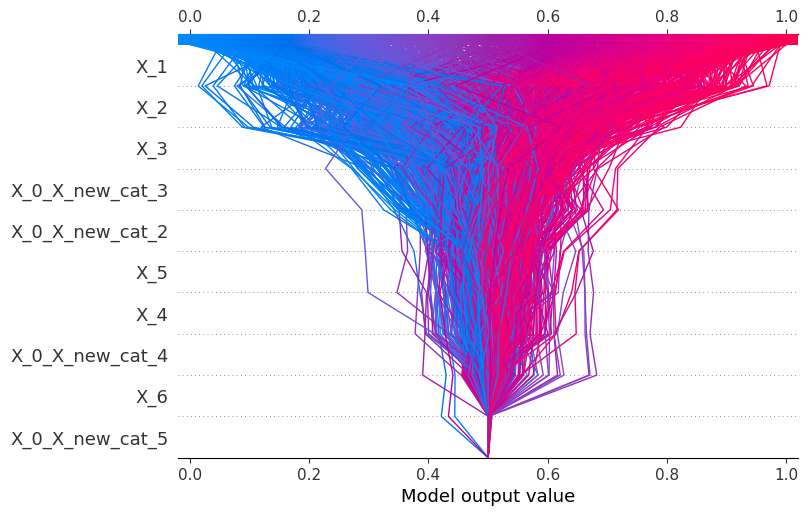

In [122]:
for i in range(shap_val.shape[1]):
    print(shap_val[:,i,0].mean())
shap.decision_plot(explain.expected_value[0], shap_val[:,:,0], X_test)

In [79]:
X_test.iloc[5]

X_1               -1.370973
X_2               -0.729145
X_3               -0.378207
X_4               -2.815455
X_5               -0.862719
X_6               -0.833314
X_7                1.222246
X_8                0.841199
X_9                0.350997
X_10               0.235919
X_11               0.916623
X_12               0.006651
X_13               1.572903
X_14               0.400354
X_15              -0.491352
X_16               0.844534
X_17               0.020080
X_18               1.065425
X_19               1.398171
X_0_X_new_cat_2    1.000000
X_0_X_new_cat_3    0.000000
X_0_X_new_cat_4    0.000000
X_0_X_new_cat_5    0.000000
Name: 106, dtype: float64

In [56]:
X[:,0]

array([-0.25307463,  0.81456787,  1.19893242, ..., -0.55965194,
        0.72666289, -1.63541639])